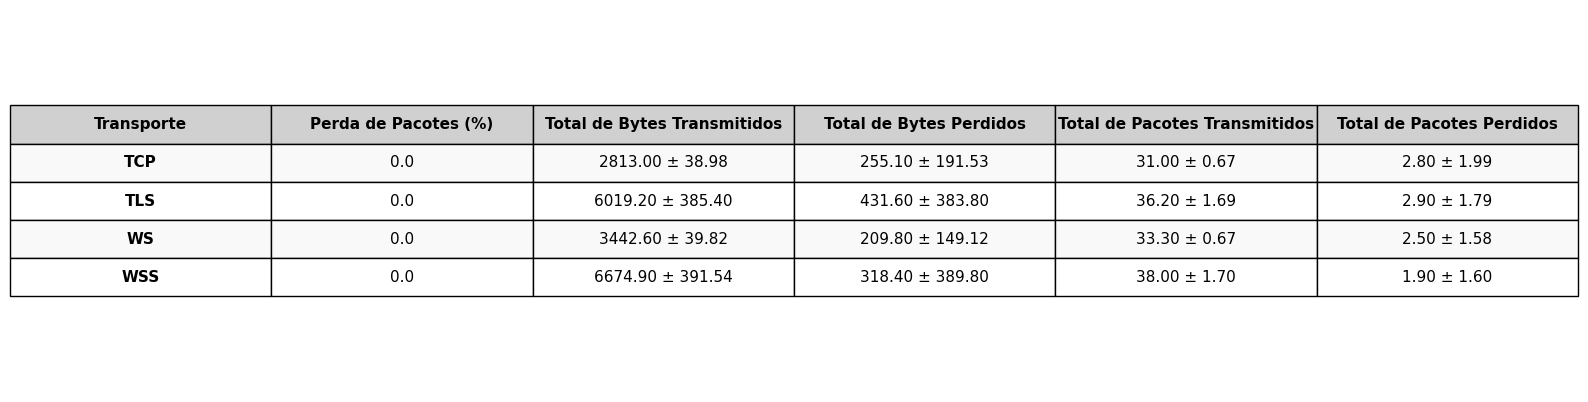

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('pcap_results.csv')  

df['loss'] = df['loss'].str.replace('%', '').astype(float)

grouped = df.groupby(['transport', 'loss']).agg({
    'Total bytes': ['mean', 'std'],
    'Error bytes': ['mean', 'std'],
    'Total packets': ['mean', 'std'],
    'Error packets': ['mean', 'std']
})

formatted_rows = []

for (transport, loss), data in grouped.iterrows():
    formatted_rows.append({
        'Transporte': transport.upper(), 
        'Perda de Pacotes (%)': loss,
        'Total de Bytes Transmitidos': f"{data[('Total bytes', 'mean')]:.2f} ± {data[('Total bytes', 'std')]:.2f}",
        'Total de Bytes Perdidos': f"{data[('Error bytes', 'mean')]:.2f} ± {data[('Error bytes', 'std')]:.2f}",
        'Total de Pacotes Transmitidos': f"{data[('Total packets', 'mean')]:.2f} ± {data[('Total packets', 'std')]:.2f}",
        'Total de Pacotes Perdidos': f"{data[('Error packets', 'mean')]:.2f} ± {data[('Error packets', 'std')]:.2f}"
    })

formatted_table = pd.DataFrame(formatted_rows)
formatted_table = formatted_table.sort_values(
    by=['Transporte', 'Perda de Pacotes (%)'],
    ascending=[True, True]
).reset_index(drop=True)

def save_table_image_clean(df, filename='tabela_formatada.png'):
    n_rows, n_cols = df.shape
    cell_height = 0.6

    fig_height = n_rows * cell_height + 1.5
    fig, ax = plt.subplots(figsize=(16, fig_height))
    ax.axis('off')

    row_colors = ['#f9f9f9' if i % 2 == 0 else 'white' for i in range(n_rows)]

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        colLoc='center',
        loc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 1.8)  # Mais espaço vertical

    for (row, col), cell in table.get_celld().items():
        cell.set_linewidth(1)
        if row == 0:
            cell.set_text_props(weight='bold', verticalalignment='center', color='black')
            cell.set_facecolor('#d0d0d0')
            cell.PAD = 0.3  
        elif row > 0:
            cell.set_facecolor(row_colors[row - 1])
            if col == 0:
                cell.set_text_props(weight='bold')  

    plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
    plt.savefig(filename, dpi=300, bbox_inches='tight')



save_table_image_clean(formatted_table)
